In [41]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas.io.data import DataReader
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN'] #Apple, Google, Microsoft, Amazon
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [2]:
for stock in tech_list:
    #globals takes stock ticker and makes it into global variable
    globals()[stock] = DataReader(stock,'yahoo',start,end)

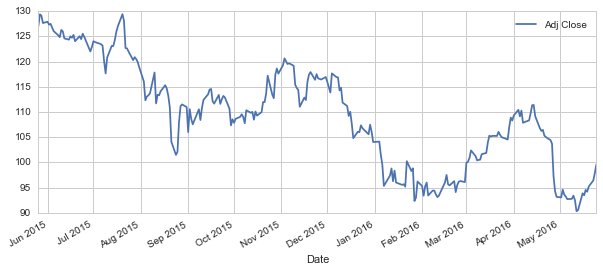

In [6]:
#Charting the closes for Apple
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

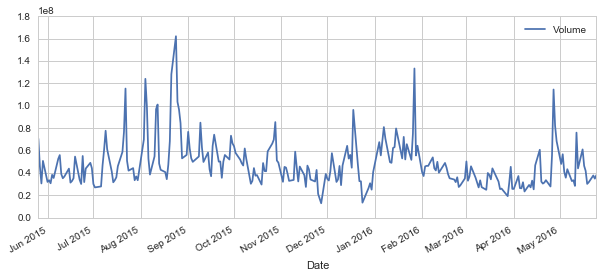

In [8]:
#Charting the volume monthly
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [9]:
ma_day = [10,20,50] #moving averages

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)


C:\Users\Cameron\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\Cameron\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\Cameron\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


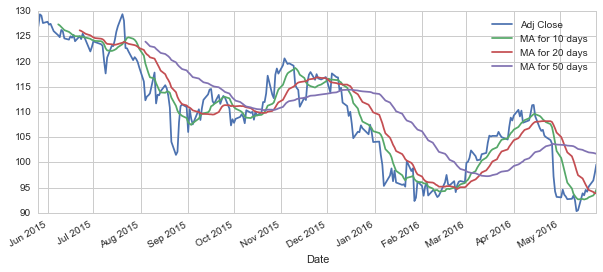

In [14]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4))

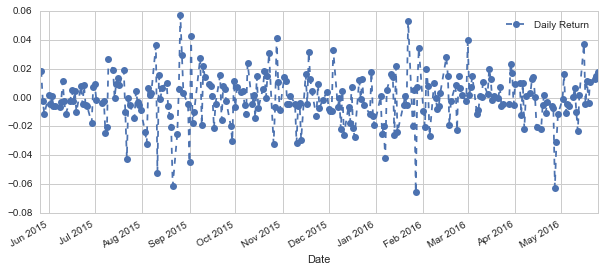

In [17]:
#Create new column based off pct change of the closing
#shows whether you gained or lost
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True, figsize=(10,4),linestyle='--',marker='o')


C:\Users\Cameron\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


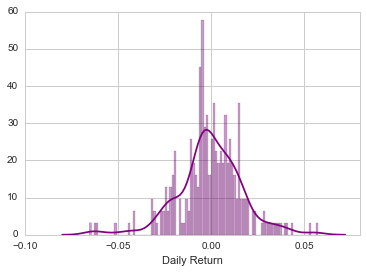

In [18]:
#plot a historgram of daily returns for a year
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [21]:
###AAPL['Daily Return'].hist(bins=100) Removed, overlayed graphs better

In [22]:
#New dataframe from ayhoo finance with just the adj closing
closing_df = DataReader(tech_list, 'yahoo',start,end)['Adj Close']

In [23]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-05-26,127.019145,425.470001,532.320007,45.330101
2015-05-27,129.390586,431.420013,539.789978,46.322518
2015-05-28,129.135808,426.570007,539.780029,46.166845
2015-05-29,127.665906,429.230011,532.109985,45.592800
2015-06-01,127.920684,430.920013,533.989990,45.952793


In [24]:
tech_returns = closing_df.pct_change()


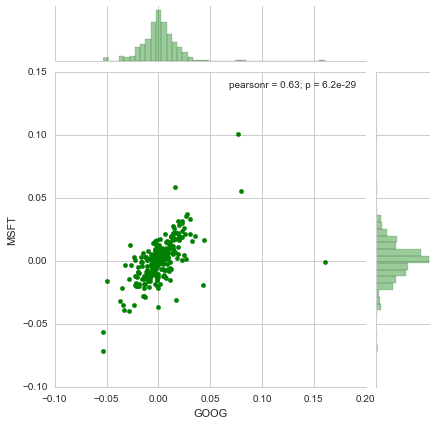

In [29]:
sns.jointplot('GOOG','MSFT', tech_returns,kind='scatter', color='green')

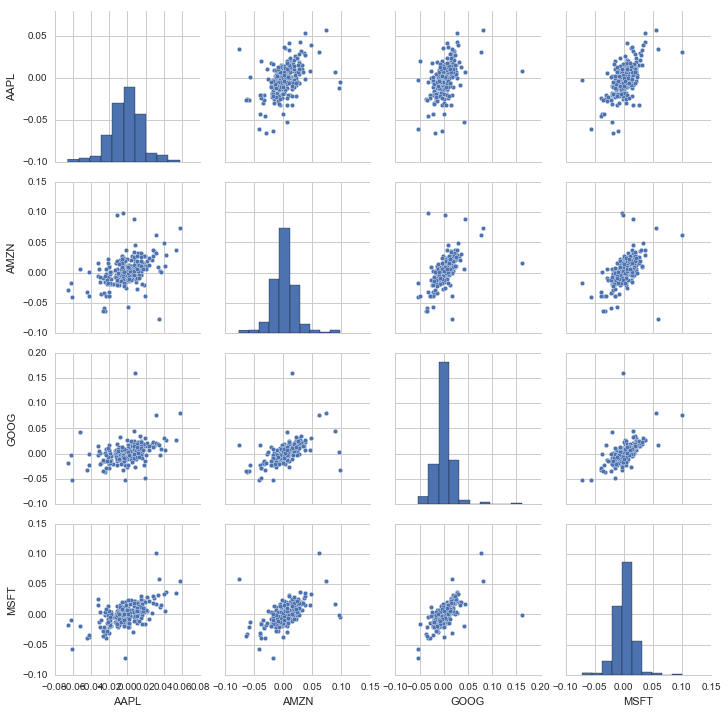

In [31]:
sns.pairplot(tech_returns.dropna())

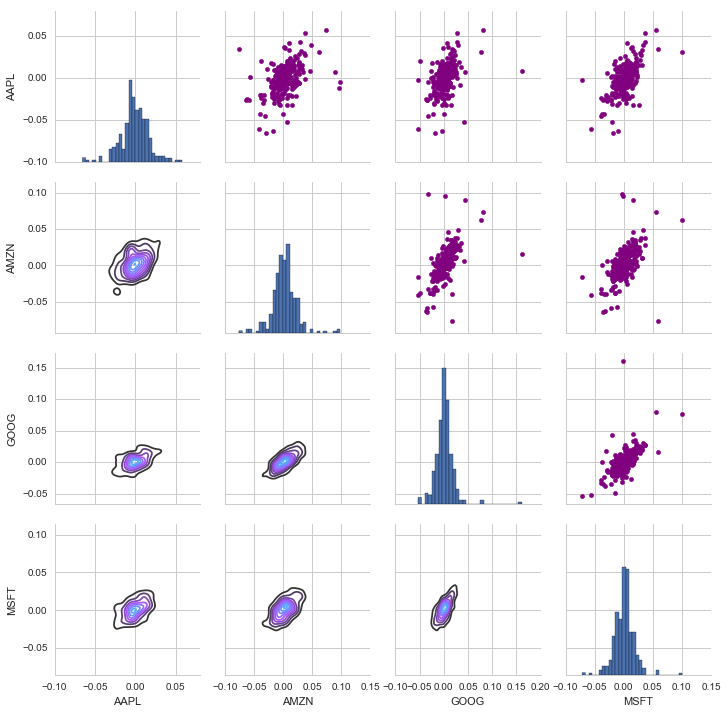

In [32]:
returns_fig = sns.PairGrid(tech_returns.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

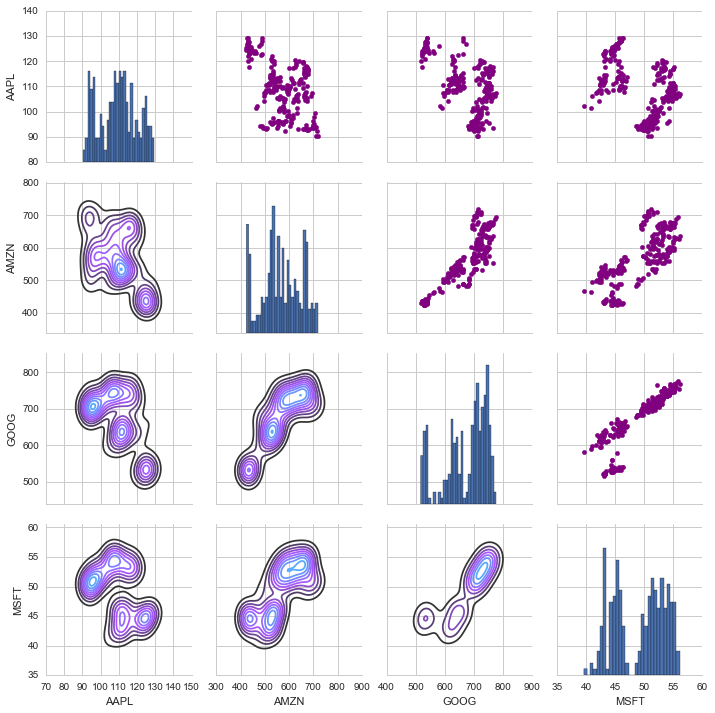

In [35]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

C:\Users\Cameron\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Cameron\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


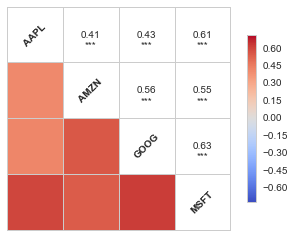

In [38]:
#to get numerical correlation values
sns.corrplot(tech_returns.dropna(),annot=True)

C:\Users\Cameron\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Cameron\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


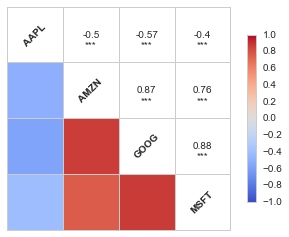

In [37]:
#to get numerical correlation values, but for closing
sns.corrplot(closing_df,annot=True)

In [39]:
rets = tech_returns.dropna()

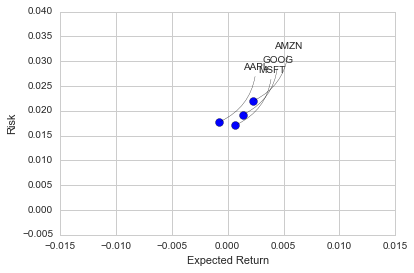

In [44]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

#Making axis titles
plt.xlabel('Expected Return')
plt.ylabel('Risk')

#for every column in the dataframe let x be the mean and y be the std dev
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext=(50,50),
        textcoords = 'offset points', ha='right', va='bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle='arc3,rad=-0.3'))